In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import acquire
import prepare
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [2]:
# Cleaned Data for Exploration
df = acquire.get_telco_data(cached = True)
train, validate, test = prepare.prep_telco_data(df)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5670 to 6867
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   3943 non-null   object 
 1   senior_citizen           3943 non-null   int64  
 2   partner                  3943 non-null   int64  
 3   dependents               3943 non-null   int64  
 4   tenure                   3943 non-null   int64  
 5   phone_service            3943 non-null   int64  
 6   multiple_lines           3943 non-null   object 
 7   online_security          3943 non-null   object 
 8   online_backup            3943 non-null   object 
 9   device_protection        3943 non-null   object 
 10  tech_support             3943 non-null   object 
 11  streaming_tv             3943 non-null   object 
 12  streaming_movies         3943 non-null   object 
 13  paperless_billing        3943 non-null   int64  
 14  monthly_charges      

In [18]:
train_stats = train.describe().T
train_stats['range'] = train_stats['max'] - train_stats['min']
train_stats

,count,mean,std,min,25%,50%,75%,max,range
senior_citizen,3943.0,0.163327,0.369711,0.00,0.00,0.00,0.000,1.0,1.00
partner,3943.0,0.484403,0.499820,0.00,0.00,0.00,1.000,1.0,1.00
dependents,3943.0,0.299011,0.457883,0.00,0.00,0.00,1.000,1.0,1.00
tenure,3943.0,31.931017,24.365751,0.00,9.00,28.00,54.000,72.0,72.00
phone_service,3943.0,0.904641,0.293747,0.00,1.00,1.00,1.000,1.0,1.00
paperless_billing,3943.0,0.585848,0.492637,0.00,0.00,1.00,1.000,1.0,1.00
monthly_charges,3943.0,64.823497,29.942691,18.25,36.35,70.15,89.750,118.6,100.35
total_charges,3935.0,2261.841423,2263.087887,18.80,403.00,1354.40,3727.625,8684.8,8666.00
churn,3943.0,0.265280,0.441538,0.00,0.00,0.00,1.000,1.0,1.00
month_to_month_contract,3943.0,0.549328,0.497624,0.00,0.00,1.00,1.000,1.0,1.00


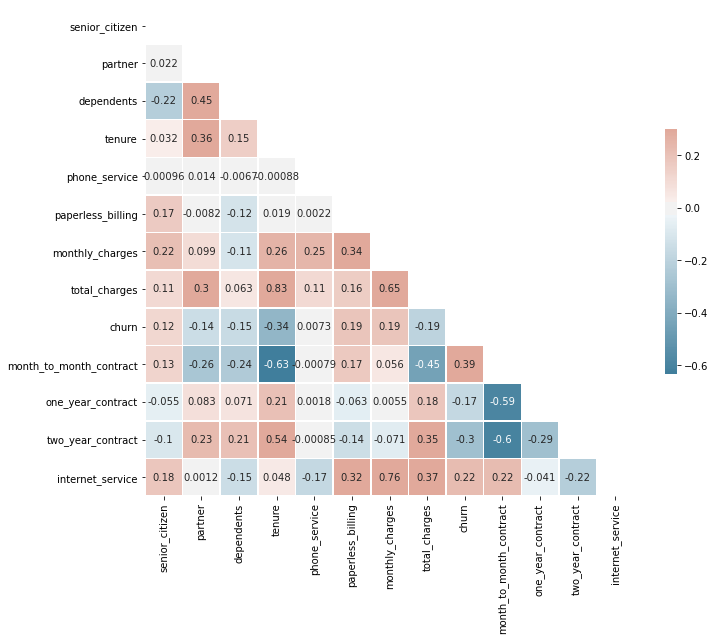

In [4]:
# Compute the correlation matrix (all train)
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

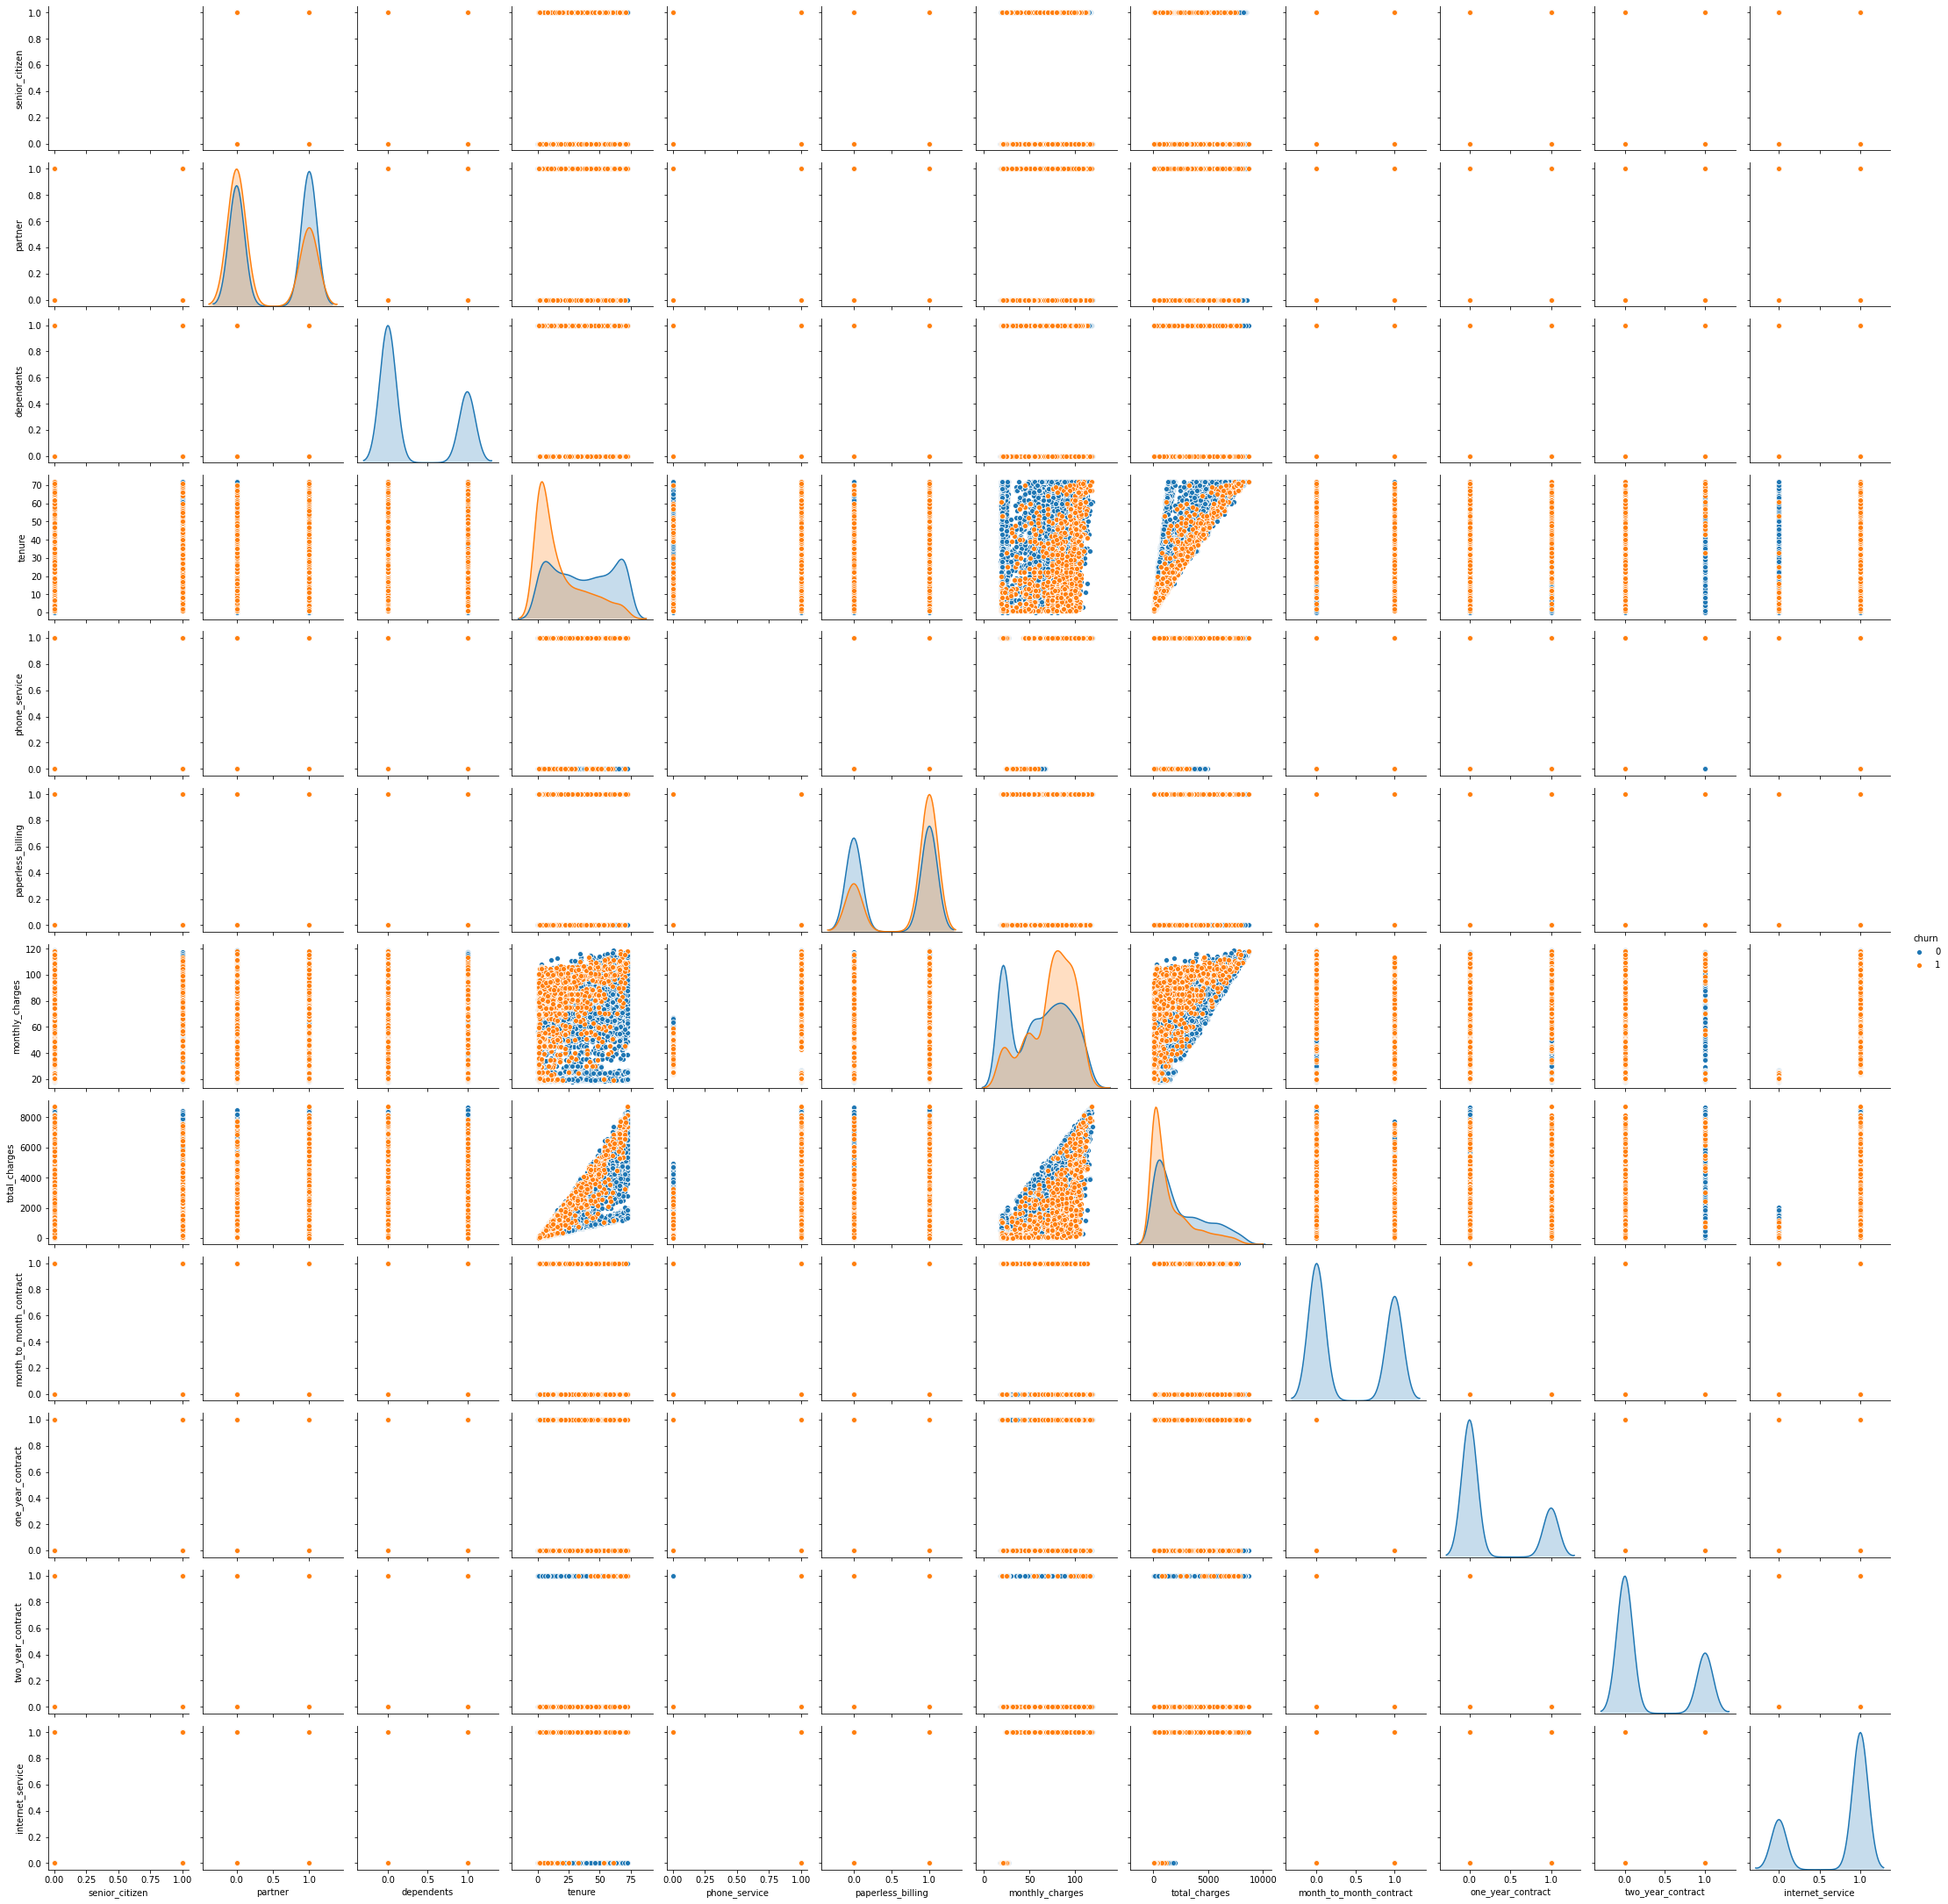

In [6]:
sns.pairplot(train, hue='churn')
plt.show()

In [ ]:
sns.pairplot(train, hue='contract_type')

In [8]:
churn_rate = train.churn.mean()

Text(0.5, 0, 'Churn')

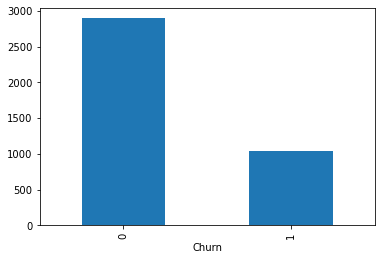

In [9]:
train.churn.value_counts().plot.bar()
plt.xlabel('Churn')

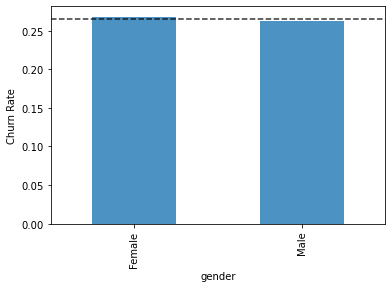

In [10]:
train.groupby('gender').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

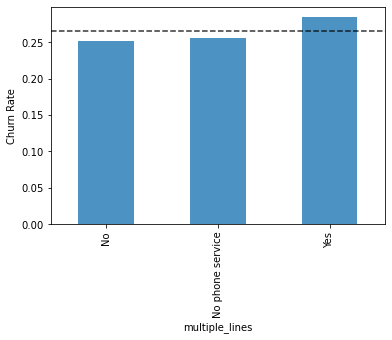

In [12]:
train.groupby('multiple_lines').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

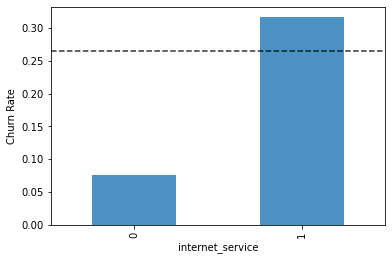

In [11]:
train.groupby('internet_service').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

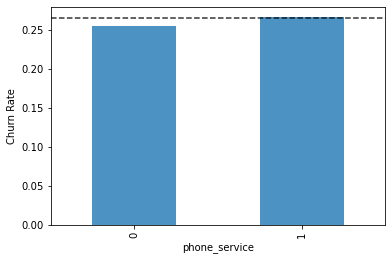

In [13]:
train.groupby('phone_service').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

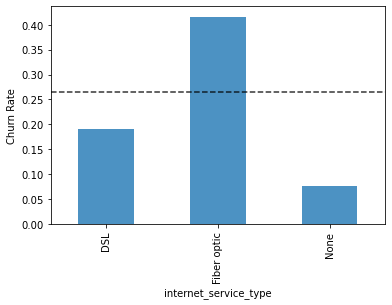

In [14]:
train.groupby('internet_service_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

In [ ]:
train.groupby('online_security').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

In [ ]:
train.groupby('online_backup').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

In [ ]:
train.groupby('contract_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

In [ ]:
train.groupby('payment_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

In [ ]:
train.info()

In [ ]:
pd.crosstab(train.churn, train.payment_type)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'internet_service_type'), cmap='Blues', annot=True)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'payment_type'), cmap='Blues', annot=True)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'streaming_movies'), cmap='Blues', annot=True)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'streaming_tv'), cmap='Blues', annot=True)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'tech_support'), cmap='Blues', annot=True)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'device_protection'), cmap='Blues', annot=True)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'online_backup'), cmap='Blues', annot=True)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'online_security'), cmap='Blues', annot=True)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'multiple_lines'), cmap='Blues', annot=True)

In [ ]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'paperless_billing'), cmap='Blues', annot=True)

## Observations
 - In month to month contracts correlation between churn and multiple phone lines(0.48)
 - In month to month contracts correlation between churn and no online security (0.5)
 - In month to month contracts correlation between churn and no tech support (0.5)
 - In month to month contracts correlation between churn and electronic check payment type (0.53)
 - In month to month contracts correlation between churn and fiber optic internet service (0.54)

In [ ]:
train.info()

In [ ]:

plt.figure(figsize=(13, 7))
sns.swarmplot(data=train, y='monthly_charges', x='internet_service_type', hue='churn')

In [ ]:
# Compute the correlation matrix (all train)
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
train = train[['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'month_to_month_contract', 'internet_service_type']]

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# # Tweak the figure to finalize
# g.set(xlabel="", ylabel="", aspect="equal")
# g.despine(left=True, bottom=True)
# g.ax.margins(.02)
# for label in g.ax.get_xticklabels():
#     label.set_rotation(90)
# for artist in g.legend.legendHandles:
#     artist.set_edgecolor(".7")


In [ ]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#2nd Heatmap, not sure which to use...
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
train.churn.var(), train.month_to_month_contract.var()


Null Hypothesis:

$H_0$: Churn and month to month contracts are independent (not dependent)

$H_a$: churn and month to month contracts are dependent


In [ ]:
# Stats testing

observed = pd.crosstab(train.churn, train.month_to_month_contract)
observed

# Set our alpha
# alpha nice and low
alpha = .05

# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

null_hypothesis = "Churn and month to month contracts are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)


Null Hypothesis:

$H_0$: Churn and being a senior citizen are independent (not dependent)

$H_a$: Churn and being a senior citizen  are dependent


In [ ]:
# Stats testing

observed = pd.crosstab(train.churn, train.senior_citizen)
observed

# Set our alpha
# alpha nice and low
alpha = .05

# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

null_hypothesis = "Churn and being a senior citizen are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

In [ ]:
# Cleaned Data for Exploration
df = acquire.get_telco_data(cached = True)
train, validate, test = prepare.prep_telco_data(df)
train.head()

In [ ]:
# 2nd set to data to examine
train = train[['churn','paperless_billing','streaming_movies', 'streaming_tv', 'tech_support', 'device_protection', 'online_backup', 'online_security', 'multiple_lines', 'monthly_charges']]


In [ ]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Null Hypothesis:

𝐻0

: Churn and paperless billing are independent (not dependent)

𝐻𝑎
: Churn and paperless billing are dependent

In [ ]:
# Stats testing

observed = pd.crosstab(train.churn, train.paperless_billing)
observed

# Set our alpha
# alpha nice and low
alpha = .05

# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

null_hypothesis = "Churn and paperless billing are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

In [ ]:

t, p = stats.ttest_ind(train.churn, train.monthly_charges, equal_var = True)
print(f'''
t = {t:.4f}
p = {p:.8f}
''')


Null Hypothesis:

𝐻0

: Churn and streaming tv are independent (not dependent)

𝐻𝑎 : Churn and streaming tv  are dependent


In [ ]:
# Stats testing

observed = pd.crosstab(train.churn, train.streaming_tv)
observed

# Set our alpha
# alpha nice and low
alpha = .05

# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

null_hypothesis = "Churn and streaming tv are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)


In [ ]:
#titanic = acquire.get_titanic_data(cached=True)

In [ ]:
#train, validate, test = prepare.prep_titanic(titanic)

In [ ]:
#train.info()

In [ ]:
#validate.info()

In [ ]:
#test.info()

# Messing around with titanic data for exploratory data analysis

In [21]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(acquire.get_titanic_data())

#train = train[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town', 'alone']]

df.head()

AttributeError: 'tuple' object has no attribute 'head'

In [ ]:
# survival_rate = train.survived.mean()

In [ ]:
# train.survived.value_counts().plot.bar()
# plt.xlabel('Survived')

In [ ]:
# train.groupby('sex').survived.mean().plot.bar(alpha=.8)
# plt.ylabel('Survival Rate')
# plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

In [ ]:
# train.groupby('alone').survived.mean().plot.bar(alpha=.8)
# plt.ylabel('Survival Rate')
# plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

In [ ]:
# # Exploring 2 categorical variables, but now we're treating survived as a category, not a number.
# pd.crosstab(train.survived, train.sex)

In [ ]:
# pd.crosstab(train.survived, train.alone)

In [ ]:
# train.groupby('survived').age.describe()

In [ ]:
# train.groupby('survived').fare.describe()

In [ ]:
# plt.figure(figsize=(13, 7))
# sns.swarmplot(data=train, y='sex', x='age', hue='survived')

# Messing around with the TELCO project dataset

In [ ]:
# We need to import data from SQL
# Connect to employees database
#defines function to create a sql url using personal credentials
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import acquire
import prepare
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('telco_churn')

query = '''
select * 
from customers as c
join contract_types as ct
on ct.contract_type_id = c.contract_type_id
join internet_service_types as i_s
on i_s.internet_service_type_id = c.internet_service_type_id
join payment_types as pt
on pt.payment_type_id = c.payment_type_id;
'''
df = pd.read_sql(query, url)

In [ ]:
# #Cleaned Data

# Delete columns 'customer_id', contract_type_id, internet_service_type_id, payment_type_id    
df.drop(columns = ['customer_id','contract_type_id','internet_service_type_id', 'payment_type_id'], inplace = True)
# Replace partner, dependents, churn, phone_service, paperless billing, with boolean value
df.partner.replace(['Yes', 'No'], [1,0], inplace = True)
df.dependents.replace(['Yes', 'No'], [1,0], inplace = True)
df.churn.replace(['Yes', 'No'], [1,0], inplace = True)
df.phone_service.replace(['Yes', 'No'], [1,0], inplace = True)
df.paperless_billing.replace(['Yes', 'No'], [1,0], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# gender = df.gender.str.get_dummies()
# df = pd.concat([df, gender], axis=1)
# df.rename(columns = {'Female': 'is_female', 'Male': 'is_male'}, inplace = True)
# df.drop(columns = ['gender'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.multiple_lines.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_multiple_lines', 'Yes': 'yes_multiple_lines'}, inplace = True)
# df.drop(columns = ['multiple_lines'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.online_security.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_online_security', 'Yes': 'yes_online_security'}, inplace = True)
# df.drop(columns = ['online_security'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.online_backup.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_online_backup', 'Yes': 'yes_online_backup'}, inplace = True)
# df.drop(columns = ['online_backup'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.device_protection.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_device_protection', 'Yes': 'yes_device_protection'}, inplace = True)
# df.drop(columns = ['device_protection'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.tech_support.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_tech_support', 'Yes': 'yes_tech_support'}, inplace = True)
# df.drop(columns = ['tech_support'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.streaming_tv.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_streaming_tv', 'Yes': 'yes_streaming_tv'}, inplace = True)
# df.drop(columns = ['streaming_tv', 'No internet service'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.streaming_movies.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_streaming_movies', 'Yes': 'yes_streaming_movies'}, inplace = True)
# df.drop(columns = ['streaming_movies'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.contract_type.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'Month-to-month': 'month_to_month_contract', 'One year': 'one_year_contract', 'Two year': 'two_year_contract'}, inplace = True)
# df.drop(columns = ['contract_type'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
#multiple = df.internet_service_type.str.get_dummies()
#df = pd.concat([df, multiple], axis=1)
#df.rename(columns = {'DSL': 'dsl', 'Fiber optic': 'fiber_optic'}, inplace = True)
df['internet_service'] = df.internet_service_type != 'None'
result = df['internet_service'].astype(int)
df['internet_service'] = result
#df.internet_service.replace(['Yes', 'No'], [1,0], inplace = True)
#df.drop(columns = ['internet_service_type','None'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.payment_type.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'Bank transfer (automatic)': 'auto_bank_transfer', 'Credit card (automatic)': 'auto_credit_card', 'Electronic check': 'e_check', 'Mailed check': 'mail_check'}, inplace = True)
# df.drop(columns = ['payment_type'], inplace = True)
# # Change total_charges to float from object
# df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')

In [ ]:
df.internet_service.value_counts()

In [ ]:
'''
Things to Consider:
1. How to handle colums that could be booleans (Yes/No/Null)
   -Keep as object or turn to int ?
   -Columns include '''
   
  

''' contract_type
    
2. Total charges change to float, it is currently an object
3. Delete origional dummy variable columns
'''

In [ ]:
# dummy multiple lines

#df